# Trajectoire d'un boulet de canon

Nous allons intégrer les équations du mouvement pour un boulet de canon soumis à des forces de frottement "turbulentes" (non-linéaires):
$$
\ddot{\mathbf{r}} = \mathbf{g} - \frac{\alpha}{m}v\times\mathbf{v}.
$$

Cette équation différentielle non linéaire du 2d ordre doit être réécrite sous la forme de deux équations différentielles couplées du 1er ordre:
$$
\begin{cases}
\dot{\mathbf{r}} &= \mathbf{v} \\
\dot{\mathbf{v}} &= \mathbf{g} - \frac{\alpha}{m}v\times\mathbf{v}.
\end{cases}
$$

Il s'agit donc de résoudre *une seule* équation différentielle du 1er ordre en $\mathbf{z} = (\mathbf{r},\mathbf{v})$. 

In [1]:
%matplotlib inline

import numpy as N
import scipy.integrate as SI
import matplotlib.pyplot as P

Valeurs numériques pour un boulet de canon de [36 livres](http://fr.wikipedia.org/wiki/Canon_de_36_livres):

In [2]:
g = 9.81 # Pesanteur [m/s2]
cx = 0.45 # Coefficient de frottement d'une sphère
rhoAir = 1.2 # Masse volumique de l'air [kg/m3] au niveau de la mer, T=20°C
rad = 0.1748/2 # Rayon du boulet [m]
rho = 6.23e3 # Masse volumique du boulet [kg/m3]
mass = 4./3.*N.pi*rad**3 * rho # Masse du boulet [kg]
alpha = 0.5*cx*rhoAir*N.pi*rad**2 / mass # Coefficient de frottement par unité de masse
print("Masse du boulet: {:.2f} kg".format(mass))
print("Coefficient de frottement par unité de masse: {} S.I.".format(alpha))

Masse du boulet: 17.42 kg
Coefficient de frottement par unité de masse: 0.0003718994604243878 S.I.


Conditions initiales:

In [3]:
v0 = 450. # Vitesse initiale [m/s]
alt = 45. # Inclinaison du canon [deg]
alt *= N.pi/180. # Inclinaison [rad]
z0 = (0.,0.,v0*N.cos(alt),v0*N.sin(alt)) # (x0,y0,vx0,vy0)

Temps caractéristique du système: $t = \sqrt{\frac{m}{g\alpha}}$ (durée du régime transitoire). L'intégration des équations se fera sur un temps caractéristique, avec des pas de temps significativement plus petits.

In [4]:
tc = N.sqrt(mass/(g * alpha))
print("Temps caractéristique: {:.1f} s".format(tc))
t = N.linspace(0, tc, 100)

Temps caractéristique: 69.1 s


Définition de la fonction $\dot{\mathbf{z}}$, avec $\mathbf{z} = (\mathbf{r},\mathbf{v})$

In [5]:
def zdot(z, t):
    """Calcul de la dérivée de z=(x,y,vx,vy) à l'instant t."""
    
    x,y,vx,vy = z
    alphav = alpha * N.hypot(vx, vy)
    
    return (vx,vy,-alphav*vx,-g-alphav*vy) # dz/dt = (vx,vy,x..,y..)

Intégration numérique des équations du mouvement à l'aide de la fonction [scipy.integrate.odeint](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html):

In [6]:
zs = SI.odeint(zdot, z0, t)

Le tableau `zs` contient les valeurs de $z$ à chaque instant $t$: il est donc de taille `(len(t),4)`.

In [7]:
ypos = zs[:,1]>=0 # y>0? 
print("temps de coll. t(y~0) = {:.0f} s".format(t[ypos][-1])) # Dernier instant pour lequel y>0
print("portée x(y~0) = {:.0f} m".format(zs[ypos,0][-1])) # Portée approximative du canon
#print "y(y~0) = {:.0f} m".format(zs[ypos,1][-1]) # ~0
print("vitesse(y~0): {:.0f} m/s".format(N.hypot(zs[ypos,2][-1],zs[ypos,3][-1])))

temps de coll. t(y~0) = 36 s
portée x(y~0) = 3966 m
vitesse(y~0): 140 m/s


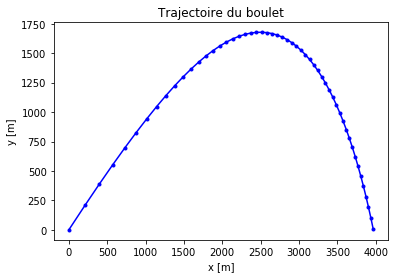

In [8]:
fig,ax = P.subplots()
ax.plot(zs[ypos,0],zs[ypos,1], 'b.-')
ax.set(xlabel="x [m]", ylabel="y [m]", title="Trajectoire du boulet");